### Importando os pacotes

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
import prince
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Criando o dataset

In [4]:
data = pd.read_csv("ObesityDataSet.csv")
data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### Analisando o dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Arredondando as variáveis para transformá-las em categóricas

In [7]:
data[["FCVC","NCP","CH2O","FAF","TUE"]] = data[["FCVC","NCP","CH2O","FAF","TUE"]].round()

In [8]:
data[["NCP","CH2O","FAF","TUE"]] = data[["NCP","CH2O","FAF","TUE"]].astype("category")

### Transformando as variáveis numéricas em ranges

In [9]:
data['Age'] = pd.qcut(data['Age'], 3, labels=list(['Younger ages', 'Average ages', 'Older ages']))
data['Height'] = pd.qcut(data['Height'], 3, labels=list(['Shorter heights', 'Average heights', 'Taller heights']))
data['Weight'] = pd.qcut(data['Weight'], 3, labels=list(['Lighter weights', 'Averege weight', 'Heavier weight']))

### Nomeando as variáveis categóricas

In [10]:
data['FCVC'] = data['FCVC'].replace({1: 'Never', 2: "Sometimes", 3: "Always"})
data['CH2O'] = data['CH2O'].replace({1: 'Less than a liter', 2: 'Three', 3: 'More than 2 L'})
data['NCP'] = data['NCP'].replace({1: 'Between 1 and 2', 2: 'Between 1 and 2 L', 3: 'More than three'})
data['FAF'] = data['FAF'].replace({0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'})
data['TUE'] = data['TUE'].replace({0: '0-2 H', 1: '3-5 H', 2: 'More than 5 H'})

C:\Users\Cliente\AppData\Local\Temp\ipykernel_13808\552857180.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['CH2O'] = data['CH2O'].replace({1: 'Less than a liter', 2: 'Three', 3: 'More than 2 L'})
C:\Users\Cliente\AppData\Local\Temp\ipykernel_13808\552857180.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['NCP'] = data['NCP'].replace({1: 'Between 1 and 2', 2: 'Between 1 and 2 L', 3: 'More than three'})
C:\Users\Cliente\AppData\Local\Temp\ipykernel_13808\552857180.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with C

### Vendo as contagens das variáveis

In [11]:
# Qual a sua idade?
print(data['Age'].value_counts())

Age
Younger ages    770
Older ages      704
Average ages    637
Name: count, dtype: int64


In [12]:
# Qual seu gênero?
print(data['Gender'].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64


In [13]:
# Qual sua altura?
print(data['Height'].value_counts())

Height
Average heights    708
Shorter heights    704
Taller heights     699
Name: count, dtype: int64


In [14]:
# Qual o seu peso?
print(data['Weight'].value_counts())

Weight
Lighter weights    704
Heavier weight     704
Averege weight     703
Name: count, dtype: int64


In [15]:
# O quanto você bebe?
print(data['CALC'].value_counts())

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


In [16]:
# Você usualmente come comida calórica frequentemente
print(data['FAVC'].value_counts())

FAVC
yes    1866
no      245
Name: count, dtype: int64


In [17]:
# Você usualmente come vegetais em suas refeições
print(data['FCVC'].value_counts())

FCVC
Sometimes    1013
Always        996
Never         102
Name: count, dtype: int64


In [18]:
# Quantas refeições no dia você tem?
print(data['NCP'].value_counts())

NCP
More than three      1470
Between 1 and 2       316
Between 1 and 2 L     176
4.0                   149
Name: count, dtype: int64


In [19]:
# Você monitora as calorias que consome diariamente?
print(data['SCC'].value_counts())

SCC
no     2015
yes      96
Name: count, dtype: int64


In [20]:
# Você fuma?
print(data['SMOKE'].value_counts())

SMOKE
no     2067
yes      44
Name: count, dtype: int64


In [21]:
# O quanto você bebe de água?
print(data['CH2O'].value_counts())

CH2O
Three                1110
More than 2 L         516
Less than a liter     485
Name: count, dtype: int64


In [22]:
# Sua família sofre de sobrepeso?
print(data['family_history_with_overweight'].value_counts())

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


In [23]:
# O quanto você faz atividade física?
print(data['FAF'].value_counts())

FAF
1 or 2 days      776
I do not have    720
2 or 4 days      496
4 or 5 days      119
Name: count, dtype: int64


In [24]:
# Quanto tempo você utiliza equipamentos eletrônicos diariamente?
print(data['TUE'].value_counts())

TUE
0-2 H            952
3-5 H            915
More than 5 H    244
Name: count, dtype: int64


In [25]:
# Você come entre as refeições?
print(data['CAEC'].value_counts())

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


In [26]:
# Qual o meio de transporte mais usado por você?
print(data['MTRANS'].value_counts())

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


In [27]:
# Nível de obesidade
print(data['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


### Dicionário para armazenar tabelas de contingência

Utilizei o V de cramer para poder diminuir para poder diminuir a dimensionalidade

In [28]:
pd.set_option('display.max_rows', None)  # Permite mostrar todas as linhas
pd.set_option('display.max_columns', None)  # Permite mostrar todas as colunas

tabelas_mca = {}
resultados = []

# Gerar tabelas de contingência e calcular V de Cramér
for coluna in data.columns:
    if coluna == "NObeyesdad":
        continue  # Pular a coluna de comparação
    tabela = pd.crosstab(data["NObeyesdad"], data[coluna])
    chi2, p, dof, expected = chi2_contingency(tabela)
    
    n = tabela.sum().sum()
    min_dim = min(tabela.shape) - 1
    v_cramer = np.sqrt((chi2 / n) / min_dim)
    
    # Se V de Cramér >= 0.7, adicionar à lista de resultados
    if v_cramer >= 0.3:
        resultados.append((coluna, chi2, p, dof, v_cramer))
    else:
        # Caso contrário, remover a coluna dos dados
        data.drop(columns=[coluna], inplace=True)

# Imprimir os resultados finais
for coluna, chi2, p, dof, v_cramer in resultados:
    print(f"Obesity X {coluna}")
    print(f"Estatística qui²: {round(chi2, 2)}")
    print(f"p-valor da estatística: {round(p, 4)}")
    print(f"Graus de liberdade: {dof}")
    print(f"V de Cramer: {round(v_cramer, 4)}")
    print("----")



Obesity X Age
Estatística qui²: 550.02
p-valor da estatística: 0.0
Graus de liberdade: 12
V de Cramer: 0.3609
----
Obesity X Gender
Estatística qui²: 657.75
p-valor da estatística: 0.0
Graus de liberdade: 6
V de Cramer: 0.5582
----
Obesity X Weight
Estatística qui²: 2845.3
p-valor da estatística: 0.0
Graus de liberdade: 12
V de Cramer: 0.8209
----
Obesity X FAVC
Estatística qui²: 233.34
p-valor da estatística: 0.0
Graus de liberdade: 6
V de Cramer: 0.3325
----
Obesity X FCVC
Estatística qui²: 566.93
p-valor da estatística: 0.0
Graus de liberdade: 12
V de Cramer: 0.3664
----
Obesity X family_history_with_overweight
Estatística qui²: 621.98
p-valor da estatística: 0.0
Graus de liberdade: 6
V de Cramer: 0.5428
----
Obesity X CAEC
Estatística qui²: 802.98
p-valor da estatística: 0.0
Graus de liberdade: 18
V de Cramer: 0.3561
----


### Elaborando a MCA

Vamos parametrizar a MCA para duas dimensões

In [29]:
mca = prince.MCA(n_components=2).fit(data)

### Quantidade total de dimensões

In [30]:
# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias
mca.J_

# Quantidade de variáveis na análise
mca.K_

# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 26
quantidade de variáveis: 8
quantidade de dimensões: 18


### Obtendo os eigenvalues

In [31]:
tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.386        17.16%                     17.16%
1              0.275        12.22%                     29.37%


### Obtendo as coordenadas principais das categorias das variáveis

In [32]:
coord_burt = mca.column_coordinates(data)

print(coord_burt)

                                           0         1
Age_Younger ages                    0.743103  0.061765
Age_Average ages                   -0.143754 -0.259525
Age_Older ages                     -0.682696  0.167270
Gender_Female                       0.208747  0.545539
Gender_Male                        -0.203861 -0.532769
Weight_Lighter weights              1.226953  0.156820
Weight_Averege weight              -0.325988 -0.962833
Weight_Heavier weight              -0.901428  0.804645
FAVC_no                             1.098325 -0.170255
FAVC_yes                           -0.144207  0.022354
FCVC_Always                        -0.053728  0.739113
FCVC_Never                          0.521579 -0.226298
FCVC_Sometimes                      0.000308 -0.703924
family_history_with_overweight_no   1.482637  0.115011
family_history_with_overweight_yes -0.330716 -0.025654
CAEC_Always                         1.017981 -0.262668
CAEC_Frequently                     1.500652  0.368369
CAEC_Somet

### Obtendo as coordenadas-padrão das categorias das variáveis

In [33]:
coord_padrao = mca.column_coordinates(data)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                                           0         1
Age_Younger ages                    1.196058  0.117816
Age_Average ages                   -0.231378 -0.495038
Age_Older ages                     -1.098831  0.319064
Gender_Female                       0.335988  1.040604
Gender_Male                        -0.328123 -1.016245
Weight_Lighter weights              1.974837  0.299131
Weight_Averege weight              -0.524692 -1.836583
Weight_Heavier weight              -1.450889  1.534843
FAVC_no                             1.767804 -0.324757
FAVC_yes                           -0.232107  0.042640
FCVC_Always                        -0.086477  1.409842
FCVC_Never                          0.839505 -0.431658
FCVC_Sometimes                      0.000495 -1.342719
family_history_with_overweight_no   2.386371  0.219381
family_history_with_overweight_yes -0.532302 -0.048935
CAEC_Always                         1.638487 -0.501034
CAEC_Frequently                     2.415367  0.702655
CAEC_Somet

### Obtendo as coordenadas das observações do banco de dados
Mostrando apenas algumas, pois a lista é muito grande

In [35]:
# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(data)

print(coord_obs.head(10))

          0         1
0  0.783069 -0.044858
1  0.772197  0.299212
2  0.209184 -0.645535
3  0.277513 -0.306163
4  0.278225 -0.848278
5  0.528039 -0.197344
6  0.343779  0.268530
7  0.886459 -0.345032
8  0.260765  0.011423
9  0.271636 -0.332647


### Plotando o mapa perceptual (coordenadas-padrão)

A análise do gráfico pode ser vista no README

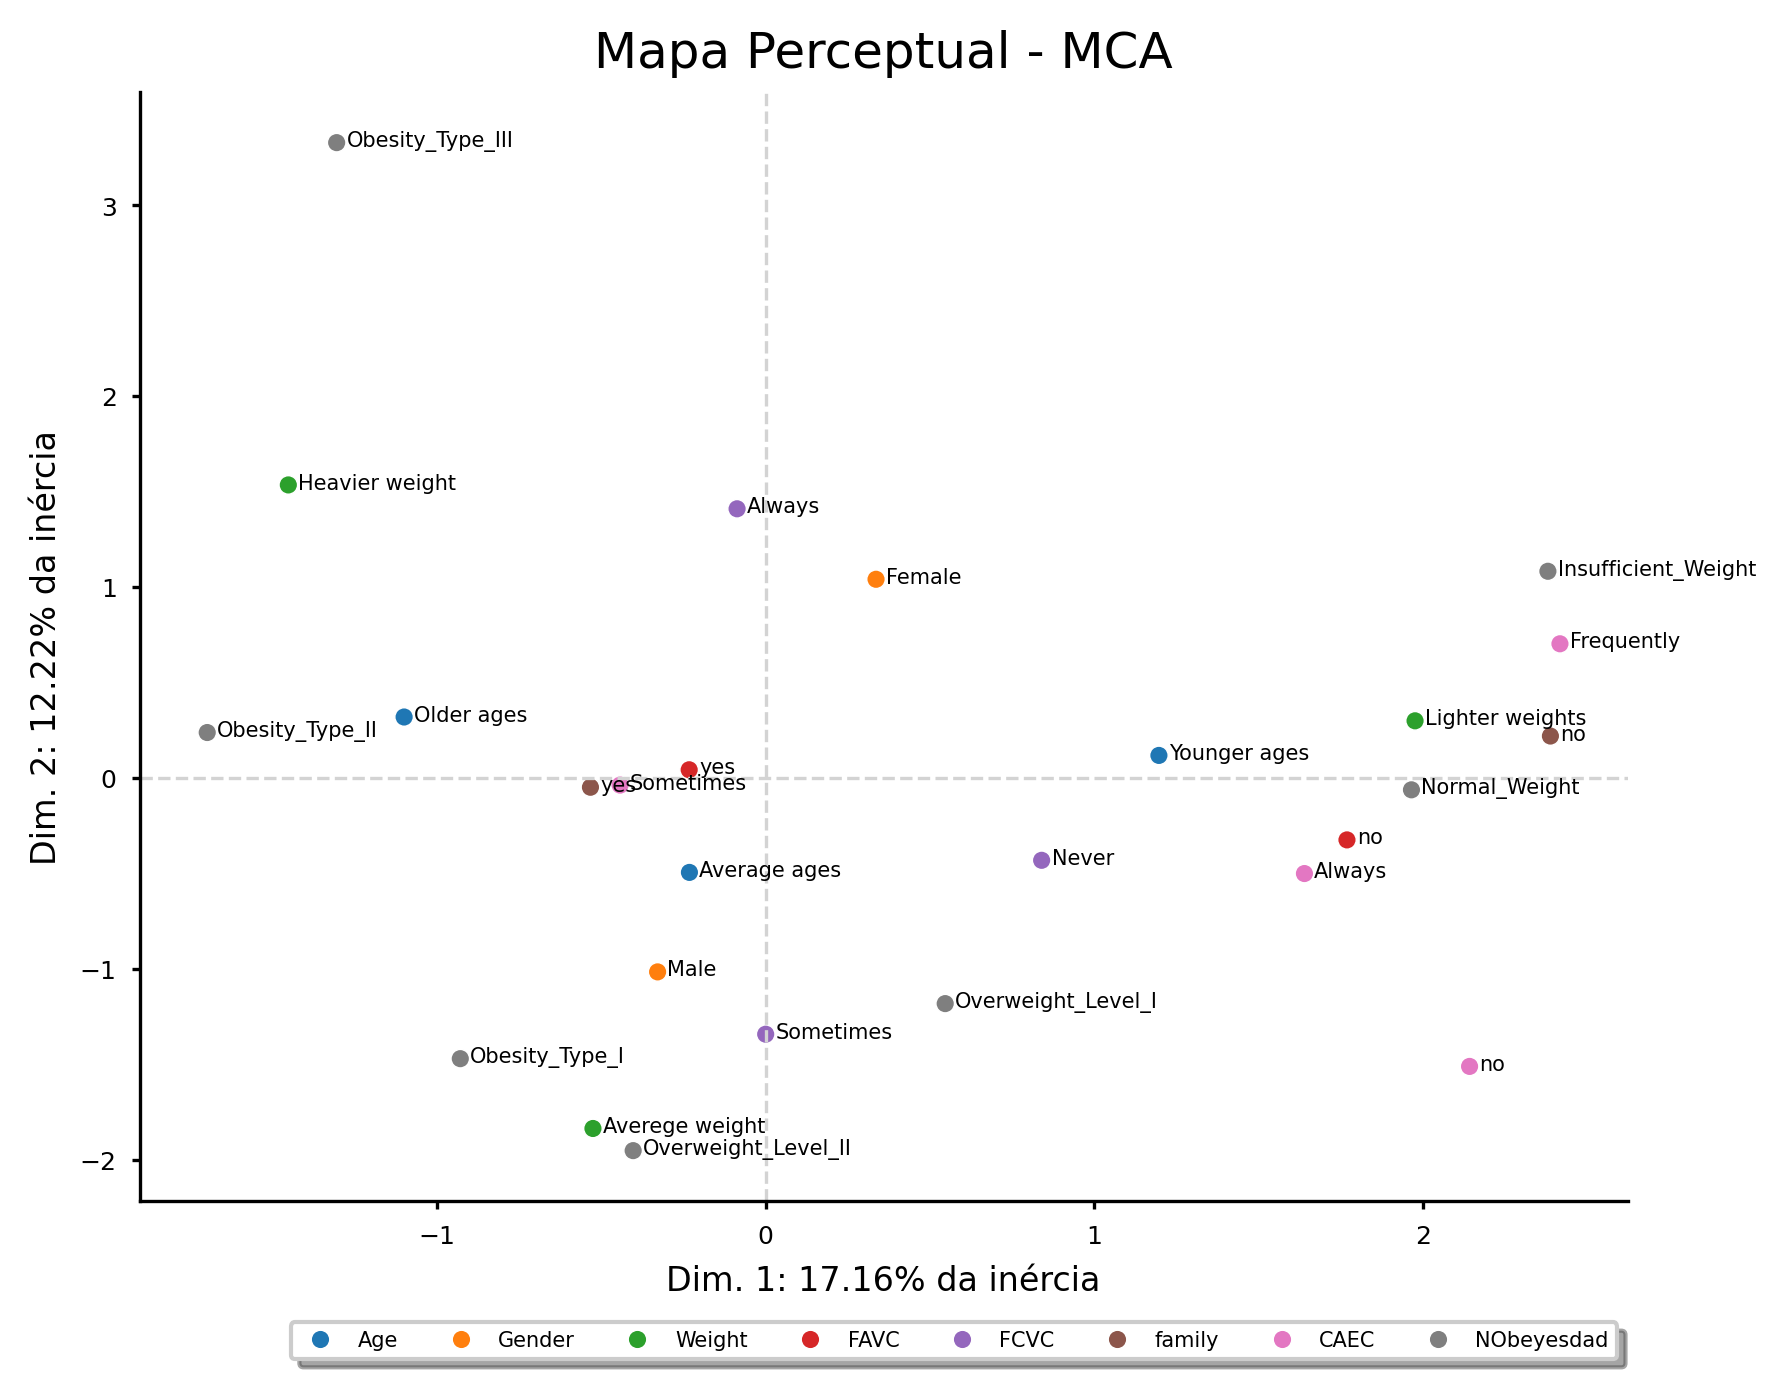

In [69]:
chart = coord_padrao.reset_index()

nome_categ=[]
for col in data:
    nome_categ.append(data[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)
plt.figure(dpi=300)
label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1,-0.1), fancybox=True, shadow=True, ncols=10, fontsize='5')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()


### Gráfico das observações

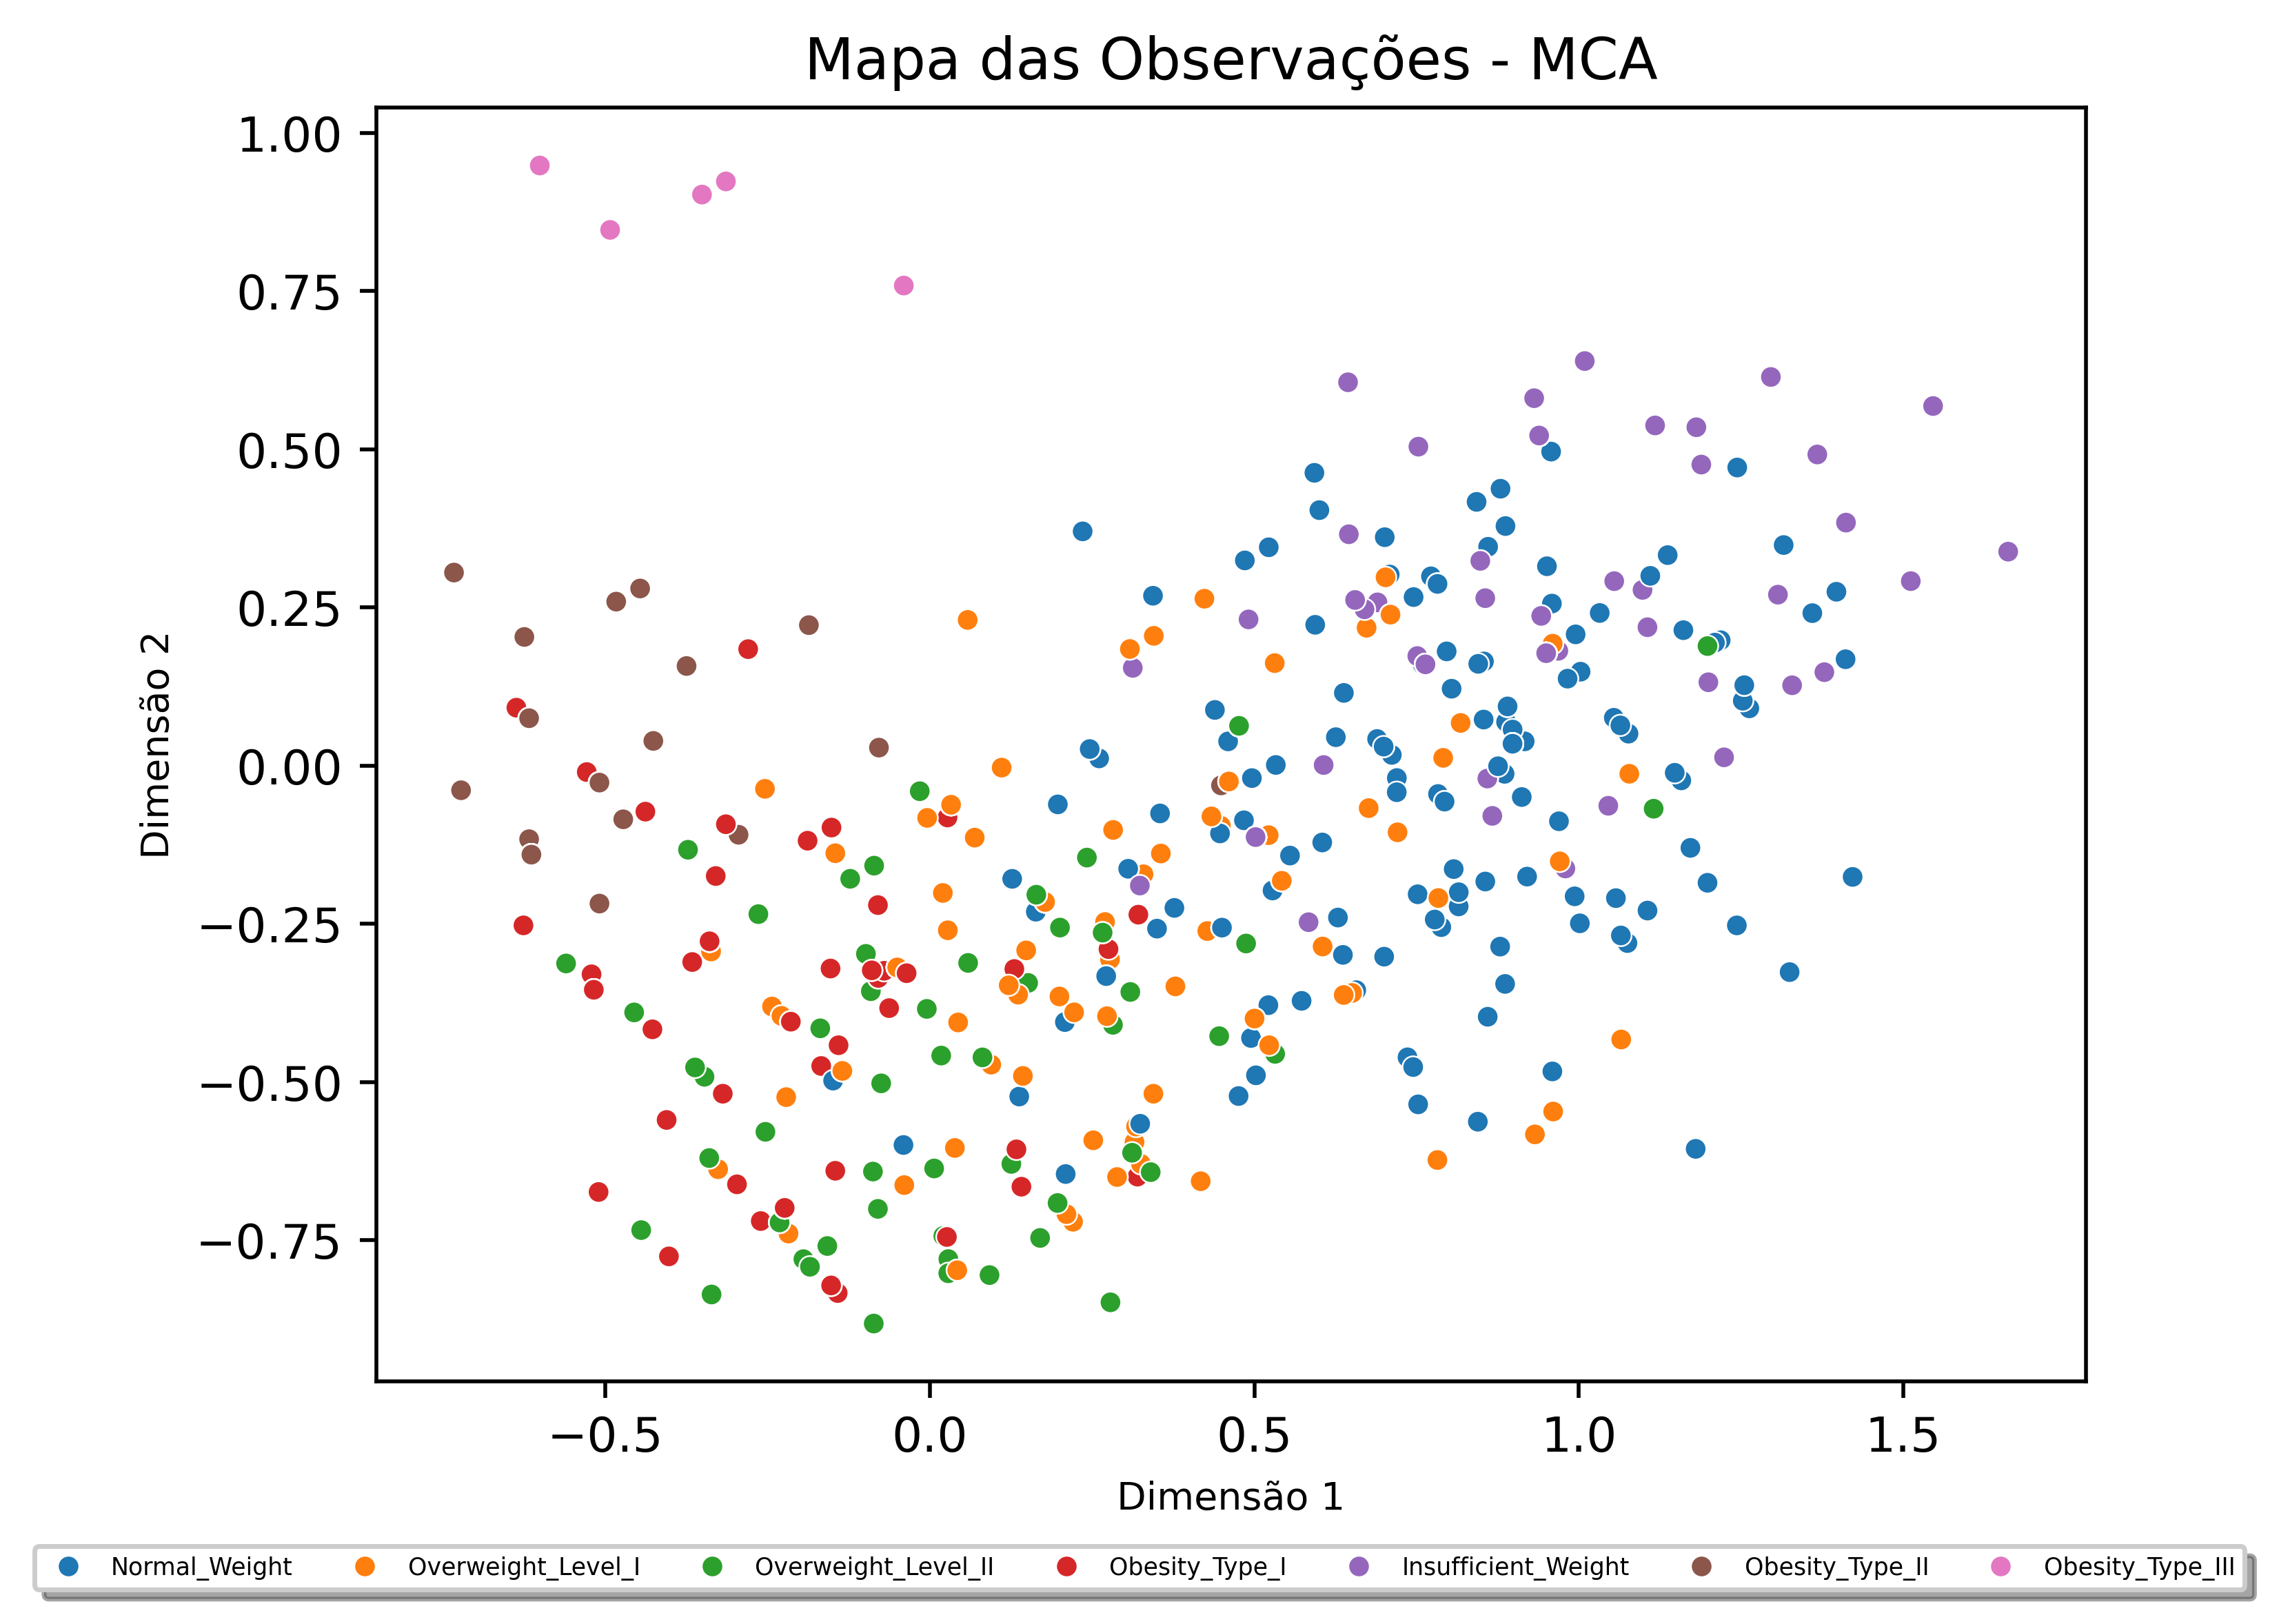

In [70]:
coord_obs['NObeyesdad'] = data['NObeyesdad']
plt.figure(dpi=500)
sns.scatterplot(data=coord_obs, x=0, y=1, hue='NObeyesdad', s=20)
plt.legend(bbox_to_anchor=(1.1,-0.12), fancybox=True, shadow=True, ncols=10, fontsize='5')
plt.title("Mapa das Observações - MCA", fontsize=12)
plt.xlabel("Dimensão 1", fontsize=8)
plt.ylabel("Dimensão 2", fontsize=8)
plt.show()
